In [2]:
%load_ext autoreload
%autoreload 2

- [Element Picker](#Element-Picker)
- [Gaussian Smoothing Picker](#Gaussian-Smoothing-Picker)
- [Von Mises](#Von-Mises-Stress-Condition)
- [Von Mises Result](#Von-Mises-Result)
- [Circle](#Circle-Stress-Condition)
- [Circle Result](#Circle-Result)

In [1]:
import struct_opt.material_opt as material_opt
import struct_opt.visual as visual
from struct_opt.environment_setup import get_element_index_matrix

import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt


Element Picker
---

elements are indexed in the following manner

| 1 | 5 | 9  | 13 |
|---|---|----|----|
| 2 | 6 | 10 | 14 |
| 3 | 7 | 11 | 15 |
| 4 | 8 | 12 | 16 |

visualize elements using function below

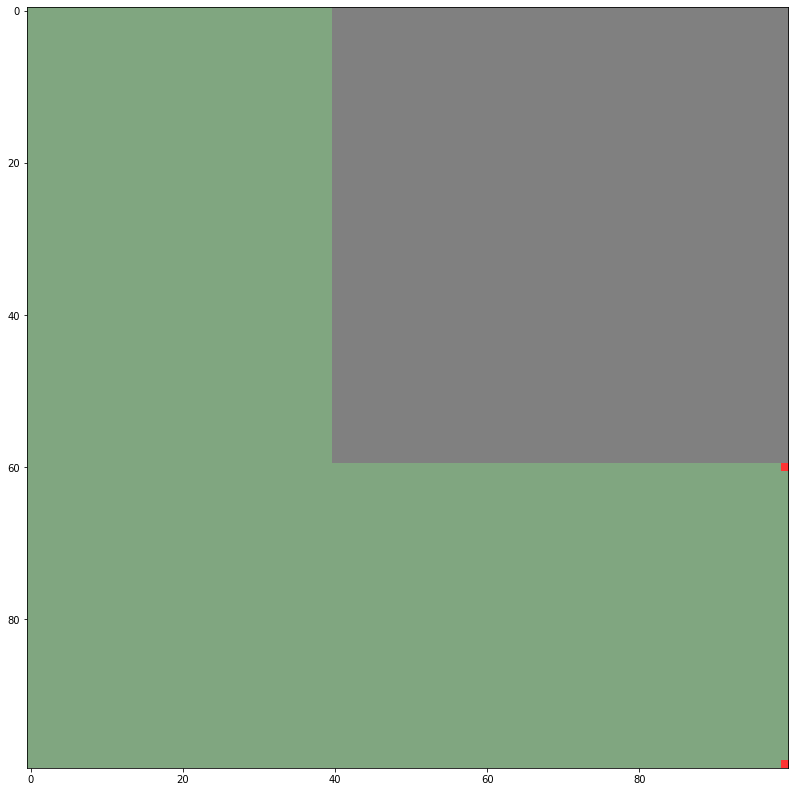

In [9]:
problem_size = 20

elements = [16 * np.square(problem_size) - problem_size * 2, 6399]
element_index_matrix = get_element_index_matrix(problem_size)


visual.highlight_elements(element_index_matrix, elements)

Gaussian Smoothing Picker
---

Use this to check how the mass is spread out for different value of the variance and width of some element

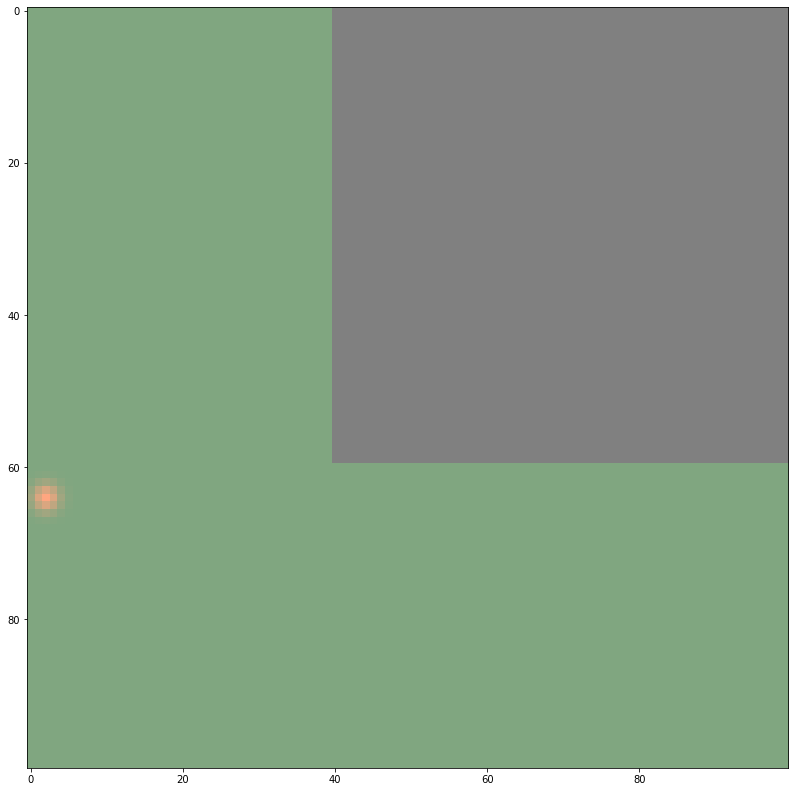

In [24]:
visual.highlight_gaussian_smoothing(element_index_matrix, element=264, variance=3.0, width=6.0)

Von Mises Stress Condition
---

In [2]:

problem_size = 20
material_opt.main(
    problem_size=problem_size,
    elements=np.array([
        16 * np.square(problem_size) - problem_size * 2
    ]),
    directions=np.array([
        1
    ]),
    amplitudes=np.array([
        -1
    ]),
    max_constraint=2.0,
    
    mode="von mises",
    
    smoothing_mode="gaussian", #gaussian or none
    smoothing_width=1.0,
    variance=0.5,
    
    penalty_mode="entropy", # entropy or linear entropy or none
    penalty_epochs=250, # Last x epochs uses penalty
    penalty_size=1.0,
    
    thickness=0.02,
    poisson_ratio=0.3,
    initial_value_design=0.0,
    elasticity_module=1000,
    
    barrier_size=7.0,
    barrier_width=2.0,
    
    epochs=250,
    learning_rate=0.2,
    
    data_directory="data"
)


Initializing env: 1.200110912322998 seconds
Instructions for updating:
Use tf.identity instead.
0: O: 3.090068817138672 W: 0.5 C 1.0 -- T: 5.010947942733765
1: O: 3.069042682647705 W: 0.48559266328811646 C 1.212922215461731 -- T: 3.026268243789673
2: O: 3.030513286590576 W: 0.4734126627445221 C 1.3682043552398682 -- T: 3.039951801300049
3: O: 2.9801063537597656 W: 0.46212753653526306 C 1.4922395944595337 -- T: 3.021049737930298
4: O: 2.921748399734497 W: 0.4510824680328369 C 1.5969349145889282 -- T: 3.0092482566833496
5: O: 2.854619026184082 W: 0.4405215382575989 C 1.6763579845428467 -- T: 3.0199859142303467
6: O: 2.784259796142578 W: 0.4308026134967804 C 1.7392386198043823 -- T: 3.031364917755127
7: O: 2.7104458808898926 W: 0.42223086953163147 C 1.7774888277053833 -- T: 3.018890619277954
8: O: 2.635375738143921 W: 0.41505348682403564 C 1.7898545265197754 -- T: 3.0394067764282227
9: O: 2.561931610107422 W: 0.40949898958206177 C 1.7798357009887695 -- T: 3.0146231651306152
10: O: 2.49205

85: O: 1.4395090341567993 W: 0.5173967480659485 C 0.8032985925674438 -- T: 3.020311117172241
86: O: 1.4366627931594849 W: 0.5178848505020142 C 0.8007704019546509 -- T: 3.0533173084259033
87: O: 1.4352033138275146 W: 0.5183506608009338 C 0.8005339503288269 -- T: 3.025212287902832
88: O: 1.4326003789901733 W: 0.5187915563583374 C 0.7983612418174744 -- T: 3.0445196628570557
89: O: 1.43093740940094 W: 0.5192131996154785 C 0.7974425554275513 -- T: 3.054978847503662
90: O: 1.428943395614624 W: 0.519618809223175 C 0.7955429553985596 -- T: 3.053060293197632
91: O: 1.427268624305725 W: 0.5200079083442688 C 0.7942209243774414 -- T: 3.052672863006592
92: O: 1.4250189065933228 W: 0.5203862190246582 C 0.7919299602508545 -- T: 3.0524590015411377
93: O: 1.4235217571258545 W: 0.5207499861717224 C 0.7904190421104431 -- T: 3.0190014839172363
94: O: 1.4214844703674316 W: 0.5211069583892822 C 0.7886834144592285 -- T: 3.0421817302703857
95: O: 1.419947624206543 W: 0.5214574933052063 C 0.7877717614173889 --

173: O: 1.3691519498825073 W: 0.5351938009262085 C 0.7003024816513062 -- T: 3.029242515563965
174: O: 1.3686473369598389 W: 0.5353151559829712 C 0.6998340487480164 -- T: 3.046119213104248
175: O: 1.3684961795806885 W: 0.5354400873184204 C 0.6994389891624451 -- T: 3.0326833724975586
176: O: 1.3676681518554688 W: 0.5355698466300964 C 0.6981468200683594 -- T: 3.0409579277038574
177: O: 1.3675713539123535 W: 0.5356993079185486 C 0.6980813145637512 -- T: 3.012124538421631
178: O: 1.3673986196517944 W: 0.5358194708824158 C 0.6971614360809326 -- T: 3.0045084953308105
179: O: 1.3667125701904297 W: 0.5359330177307129 C 0.6962517499923706 -- T: 3.0176491737365723
180: O: 1.3661785125732422 W: 0.5360392928123474 C 0.6950893402099609 -- T: 3.049790620803833
181: O: 1.3654043674468994 W: 0.5361378192901611 C 0.6944791674613953 -- T: 3.0511512756347656
182: O: 1.3653006553649902 W: 0.5362336039543152 C 0.6937289834022522 -- T: 3.0217840671539307
183: O: 1.365425944328308 W: 0.5363333821296692 C 0.69

Von Mises Result
---

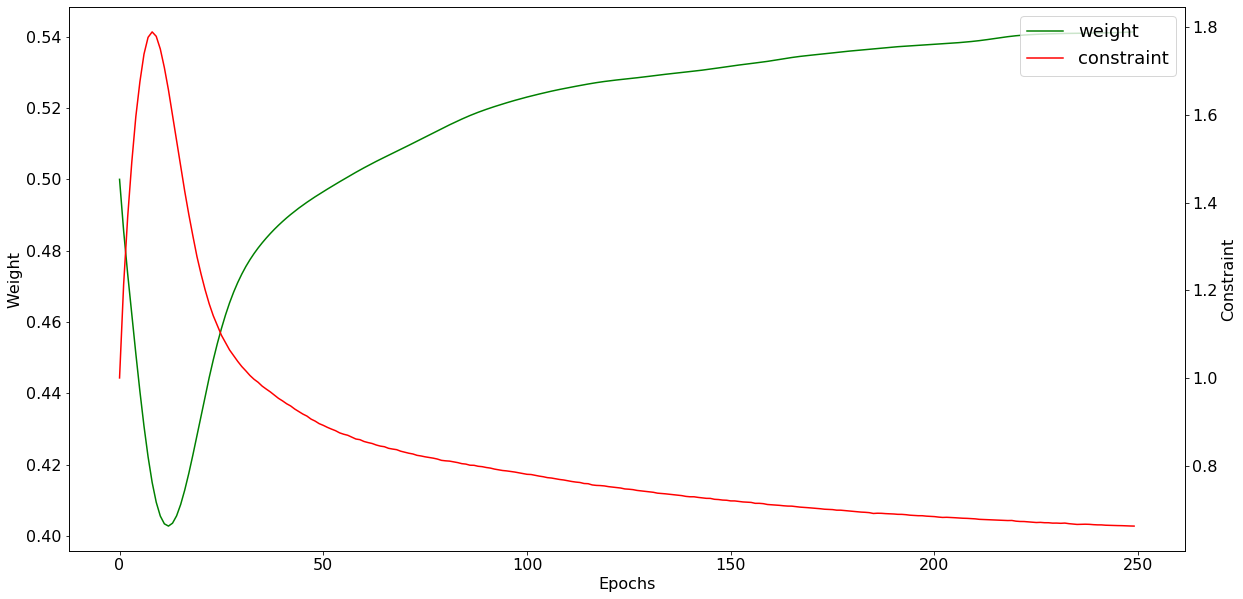

In [3]:
V = visual.Visual(data_path="data", plot=False)

V.constraint_weigth_plot()

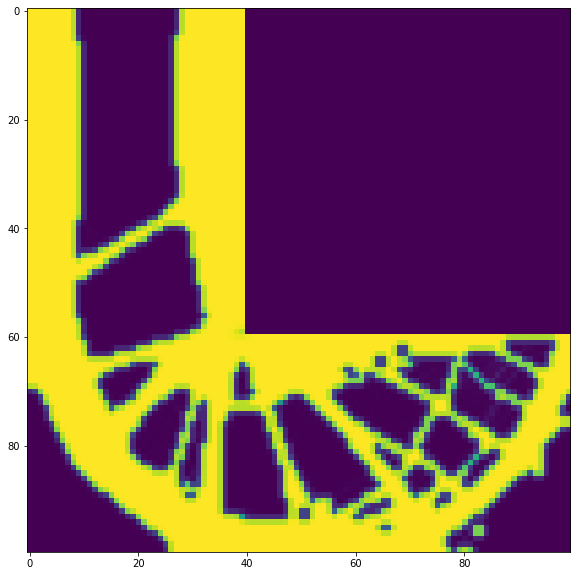

In [4]:
design_animation = V.animate(problem_size, mode="design")
HTML(design_animation.to_html5_video())

Circle Stress Condition
---

In [6]:
problem_size = 20
material_opt.main(
    problem_size=problem_size,
    elements=np.array([
        16 * np.square(problem_size) - problem_size * 2, 6399
    ]),
    directions=np.array([
        1,
        0
    ]),
    amplitudes=np.array([
        -1,
        -1
    ]),
    max_constraint=3.0,
    
    mode="circle",
    
    smoothing_mode="gaussian", # gasssian or none
    smoothing_width=1.0,
    variance=0.5,
    
    penalty_mode="entropy", # entropy or none
    penalty_epochs=120, # Last x epochs uses penalty
    penalty_size=1.0,
    
    
    thickness=0.02,
    poisson_ratio=0.3,
    initial_value_design=0.0,
    elasticity_module=1000,
    
    barrier_size=2.0,
    barrier_width=2.5,
    
    epochs=120,
    learning_rate=0.2,
    
    phis=[0.0, np.pi],
    kf=0.3,
    
    data_directory="data"
)


Initializing env: 0.32126426696777344 seconds
0: O: 2.430157423019409 W: 0.5 C 1.0 -- T: 3.1343941688537598
1: O: 2.400228977203369 W: 0.4730939567089081 C 1.0620121955871582 -- T: 3.0596978664398193
2: O: 2.3476080894470215 W: 0.4449723958969116 C 1.1123201847076416 -- T: 3.0810627937316895
3: O: 2.2748777866363525 W: 0.41674208641052246 C 1.1599973440170288 -- T: 3.0813260078430176
4: O: 2.1868979930877686 W: 0.38906776905059814 C 1.2119626998901367 -- T: 3.069633960723877
5: O: 2.0873067378997803 W: 0.36244046688079834 C 1.2711124420166016 -- T: 3.0605885982513428
6: O: 1.9803485870361328 W: 0.3373444676399231 C 1.3388895988464355 -- T: 3.063507318496704
7: O: 1.8699498176574707 W: 0.31414902210235596 C 1.4150476455688477 -- T: 3.0591025352478027
8: O: 1.7609686851501465 W: 0.2932073473930359 C 1.4992613792419434 -- T: 3.068305730819702
9: O: 1.6579868793487549 W: 0.27476921677589417 C 1.5902190208435059 -- T: 3.052051305770874
10: O: 1.56528902053833 W: 0.25896894931793213 C 1.6863

88: O: 0.684334933757782 W: 0.2769092321395874 C 1.5423799753189087 -- T: 3.061610221862793
89: O: 0.6823583245277405 W: 0.2772562801837921 C 1.5446945428848267 -- T: 3.06441068649292
90: O: 0.6807340979576111 W: 0.2775956094264984 C 1.547088623046875 -- T: 3.052788019180298
91: O: 0.6782654523849487 W: 0.2779276371002197 C 1.5481222867965698 -- T: 3.066229820251465
92: O: 0.6768412590026855 W: 0.2782441973686218 C 1.5502327680587769 -- T: 3.054687738418579
93: O: 0.6758139133453369 W: 0.278548926115036 C 1.5531363487243652 -- T: 3.0535998344421387
94: O: 0.6735401749610901 W: 0.2788509428501129 C 1.555696964263916 -- T: 3.089541435241699
95: O: 0.6716457605361938 W: 0.2791478633880615 C 1.5586360692977905 -- T: 3.0643529891967773
96: O: 0.6702721118927002 W: 0.27944111824035645 C 1.5628960132598877 -- T: 3.0548126697540283
97: O: 0.668554425239563 W: 0.27973484992980957 C 1.5672539472579956 -- T: 3.051490306854248
98: O: 0.6666264533996582 W: 0.2800268530845642 C 1.571201205253601 -- 

Circle Result
---

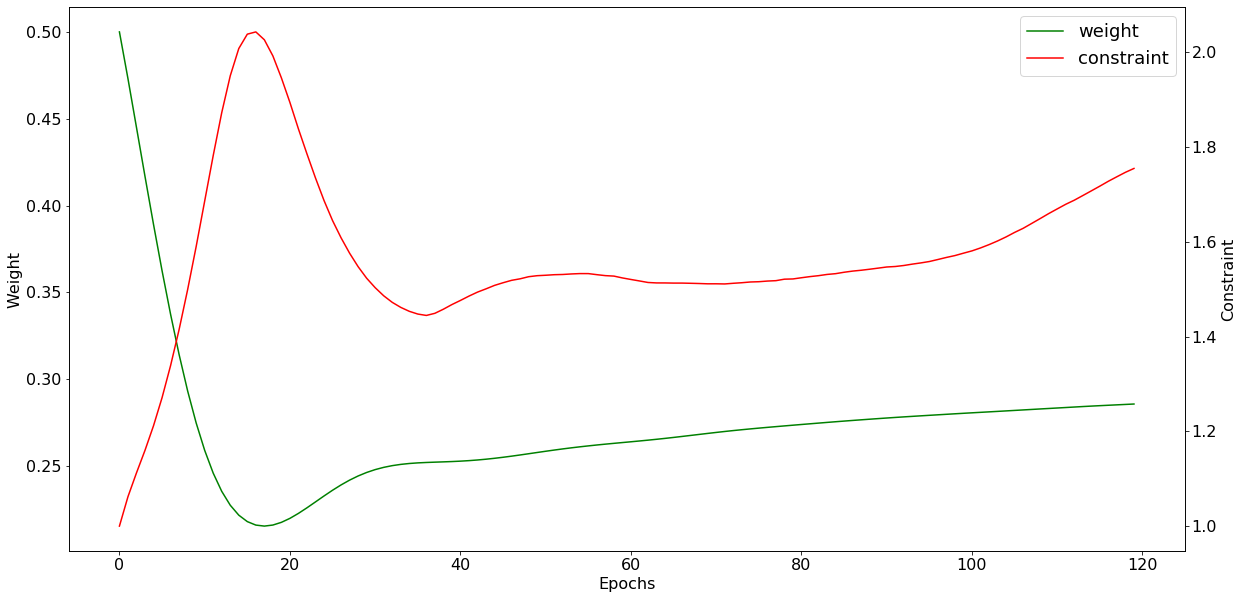

In [7]:
V = visual.Visual(data_path="data", plot=False)

V.constraint_weigth_plot()

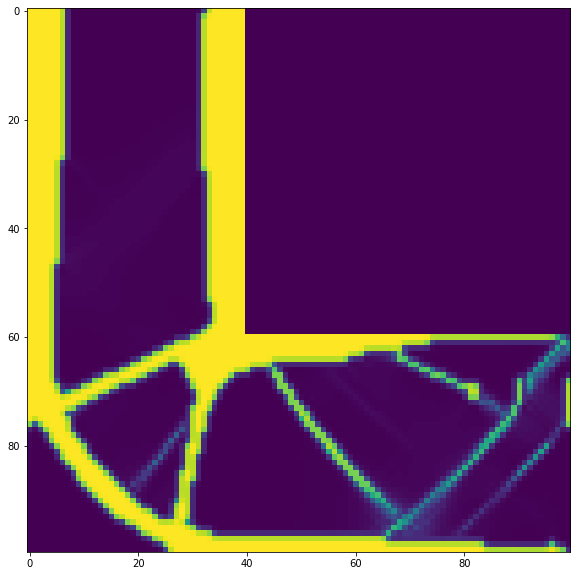

In [8]:
design_animation = V.animate(problem_size, mode="design")
HTML(design_animation.to_html5_video())